# Survey Dataset_analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
try:
    data = pd.read_csv(r"Survey Dataset.csv")
    print ("Data dataset has {} samples with {} features each.".format(*data.shape))
except:
    print ("Dataset could not be loaded. Is the dataset missing?")

Data dataset has 6867 samples with 14 features each.


In [3]:
data.head() #It shows the first N rows in the data (by default, N=5).

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [4]:
data.tail()  #It shows the last N rows in the data (by default, N=5).

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
6862,6863,6-1-2017,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329
6863,6864,6-1-2017,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780
6864,6865,6-1-2017,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926
6865,6866,6-1-2017,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137
6866,6867,6-1-2017,Rural,10th Pass,"₹ 5,000 - ₹ 10,000",JAP(L),JAP(L),Fully Satisfied,Fully Satisfied,33,Male,241,Gen,1.797518


In [5]:
data.shape #It shows the total no. of rows and no. of columns of the dataframe

(6867, 14)

In [6]:
# Retrieve column names
data.columns

Index(['response_id', 'collection_date', 'urban_rural', 'education', 'income',
       'Vote_Now', 'Past_Vote', 'CM_satisfaction', 'MLA_satisfaction', 'age',
       'gender', 'assembly_no', 'category', 'weight'],
      dtype='object')

In [7]:
data.dtypes #dtypes - To show the data-type of each column

response_id           int64
collection_date      object
urban_rural          object
education            object
income               object
Vote_Now             object
Past_Vote            object
CM_satisfaction      object
MLA_satisfaction     object
age                  object
gender               object
assembly_no           int64
category             object
weight              float64
dtype: object

In [8]:
data.index #To show index of the dataset.

RangeIndex(start=0, stop=6867, step=1)

In [9]:
data.size #To show No. of total values(elements) in the dataset.


96138

In [10]:
data.info() #To show indexes, columns, data-types of each column, memory at once

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   response_id       6867 non-null   int64  
 1   collection_date   6867 non-null   object 
 2   urban_rural       6867 non-null   object 
 3   education         6867 non-null   object 
 4   income            6867 non-null   object 
 5   Vote_Now          6867 non-null   object 
 6   Past_Vote         6867 non-null   object 
 7   CM_satisfaction   6867 non-null   object 
 8   MLA_satisfaction  6867 non-null   object 
 9   age               6867 non-null   object 
 10  gender            6867 non-null   object 
 11  assembly_no       6867 non-null   int64  
 12  category          6867 non-null   object 
 13  weight            6867 non-null   float64
dtypes: float64(1), int64(2), object(11)
memory usage: 751.2+ KB


In [11]:
# Display a description of the dataset
stats = data.describe().round()
stats

,response_id,assembly_no,weight
count,6867.0,6867.0,6867.0
mean,3434.0,131.0,1.0
std,1982.0,66.0,2.0
min,1.0,1.0,0.0
25%,1718.0,79.0,0.0
50%,3434.0,135.0,0.0
75%,5150.0,184.0,1.0
max,6867.0,243.0,51.0


# Task. 1) Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.

In [12]:
data.duplicated().sum() #To check row wise and detect the Duplicate rows.


0

# Task. 2) Is there any Null Value present in any column ? Show with Heat-map

In [13]:
data.isna().sum()

response_id         0
collection_date     0
urban_rural         0
education           0
income              0
Vote_Now            0
Past_Vote           0
CM_satisfaction     0
MLA_satisfaction    0
age                 0
gender              0
assembly_no         0
category            0
weight              0
dtype: int64

<AxesSubplot:>

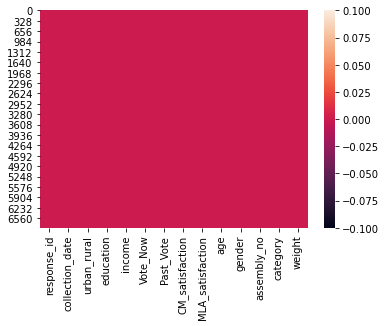

In [14]:
sns.heatmap(data.isnull())

# Question 1 - How many samples were collected on each day?

In [15]:
data.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419


In [16]:
data.collection_date.nunique()

9

In [17]:
data.collection_date.unique()

array(['5-24-2017', '5-25-2017', '5-26-2017', '5-27-2017', '5-28-2017',
       '5-29-2017', '5-30-2017', '5-31-2017', '6-1-2017'], dtype=object)

In [18]:
data.collection_date.value_counts()

5-24-2017    1479
5-25-2017     998
5-28-2017     761
5-27-2017     665
5-29-2017     620
6-1-2017      607
5-26-2017     598
5-30-2017     582
5-31-2017     557
Name: collection_date, dtype: int64

# Question 2 - What proportion of the total respondents were aged less than 45?

In [19]:
data.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [20]:
#data[data['age']<45]

In [21]:
#data['age'] = data['age'].astype(int)

In [22]:
data.age.dtype

dtype('O')

In [23]:
data.age.unique()

array(['26', '34', '25', '36', '22', '38', '23', '42', '51', '29', '24',
       '30', '39', '37', '19', '44', '53', '32', '21', '18', '20', '27',
       '48', '28', '45', '74', '35', '31', '70', '40', '49', '46', '43',
       '41', '33', '58', '24ko', '56', '50', '55', '54', '62', '60', '59',
       '47', '61', '52', '66', '57', '67', '65', '71', '63', '64', '68',
       '69', '99', '72', '75', '76'], dtype=object)

In [24]:
data.age.value_counts()

25      598
24      449
30      440
28      396
22      392
26      389
27      360
20      328
23      317
21      311
35      263
32      263
29      239
40      177
34      173
19      171
31      159
33      143
38      135
36      127
18      125
42      104
37       90
45       82
43       72
39       69
50       60
44       54
41       54
48       35
47       34
46       32
49       27
52       24
51       23
55       20
60       15
53       12
61       12
54       11
57       10
58        9
56        9
64        8
67        7
65        5
59        5
62        5
66        4
63        4
68        4
70        3
71        2
76        1
69        1
75        1
24ko      1
74        1
72        1
99        1
Name: age, dtype: int64

In [25]:
data['age'].replace(('24ko',24),inplace=True)

In [26]:
data.age.value_counts()

25    598
24    449
30    440
28    396
22    392
26    389
27    360
20    328
23    317
21    311
32    263
35    263
29    239
40    177
34    173
19    171
31    159
33    143
38    135
36    127
18    125
42    105
37     90
45     82
43     72
39     69
50     60
44     54
41     54
48     35
47     34
46     32
49     27
52     24
51     23
55     20
60     15
61     12
53     12
54     11
57     10
58      9
56      9
64      8
67      7
65      5
59      5
62      5
66      4
63      4
68      4
70      3
71      2
76      1
69      1
75      1
74      1
72      1
99      1
Name: age, dtype: int64

In [27]:
data.age.dtype

dtype('O')

In [28]:
data['age'] = data['age'].astype(int)

In [29]:
data[data['age']>45]

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
12,13,5-24-2017,Urban,Post - Graduation,"₹ 5,000 - ₹ 10,000",Undecided,JD(U),Somewhat Dissatisfied,Somewhat Dissatisfied,51,Male,183,SC,20.558759
33,34,5-24-2017,Urban,Graduate,"₹ 50,000 - ₹ 80,000",BJP,BJP,Fully Satisfied,Somewhat Dissatisfied,53,Male,188,Gen,1.936195
59,60,5-24-2017,Rural,12th Pass,"₹ 5,000 - ₹ 10,000",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,48,Male,171,BC,2.824391
69,70,5-24-2017,Rural,Graduate,"₹ 30,000 - ₹ 50,000",RJD,INC,Fully Dissatisfied,Fully Satisfied,74,Male,192,ST,1.805903
74,75,5-24-2017,Urban,Graduate,"₹ 30,000 - ₹ 50,000",BJP,BJP,Somewhat Dissatisfied,Somewhat Satisfied,70,Male,183,BC,0.343147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6787,6788,6-1-2017,Rural,10th Pass,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,60,Male,144,SC,4.741094
6804,6805,6-1-2017,Rural,Graduate,"₹ 10,000 - ₹ 20,000",BJP,BJP,Fully Satisfied,Can’t say,50,Male,146,EBC,2.968566
6810,6811,6-1-2017,Rural,12th Pass,"₹ 1,50,000 & above",RJD,RJD,Somewhat Satisfied,Fully Dissatisfied,52,Male,150,Gen,2.112264
6829,6830,6-1-2017,Urban,Graduate,"₹ 20,000 - ₹ 30,000",JD(U),JD(U),Fully Satisfied,Somewhat Satisfied,48,Male,146,EBC,6.328899


# Question 3 - Create a new column in the dataframe “age_group”. This column should contain the age group the respondent belongs to. The age groupsare 18-25, 25-40, 40-55 and 55+. The dataframe should look like this after the column creation.


In [30]:
data.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419


In [31]:
df=data.copy()

In [32]:
df.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [33]:
df.insert(10,'agegroup',data.age)

In [34]:
df.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,agegroup,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,34,Male,189,BC,0.603419
2,3,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,25,Male,191,Gen,0.673762
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,36,Male,194,Gen,1.101298
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,22,Male,176,BC,0.333505


In [35]:
df1=df[(df['age']>=18)&(df['age']<25)]

In [36]:
df1.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,agegroup,gender,assembly_no,category,weight
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,22,Male,176,BC,0.333505
8,9,5-24-2017,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,23,Male,181,Gen,0.226477


In [37]:
df1.agegroup.unique()

array([22, 23, 24, 19, 21, 18, 20])

In [38]:
df1['agegroup']='18-25'

<ipython-input-38-6b83953a6501>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['agegroup']='18-25'


In [39]:
df1.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,agegroup,gender,assembly_no,category,weight
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505
8,9,5-24-2017,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477


In [40]:
df2=df[(df['age']>=25)&(df['age']<40)]
df2['agegroup']='25-40'
df2.head(2)

<ipython-input-40-547ac2e46b11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['agegroup']='25-40'


,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,agegroup,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,25-40,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,25-40,Male,189,BC,0.603419


In [41]:
df3=df[(df['age']>=40)&(df['age']<55)]
df3['agegroup']='40-55'
df3.head(2)

<ipython-input-41-a0d99516004c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['agegroup']='40-55'


,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,agegroup,gender,assembly_no,category,weight
11,12,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",LJP,JD(U),Somewhat Satisfied,Fully Dissatisfied,42,40-55,Male,183,BC,2.824391
12,13,5-24-2017,Urban,Post - Graduation,"₹ 5,000 - ₹ 10,000",Undecided,JD(U),Somewhat Dissatisfied,Somewhat Dissatisfied,51,40-55,Male,183,SC,20.558759


In [42]:
df4=df[(df['age']>=55)]
df4['agegroup']='55+'
df4.head(2)

<ipython-input-42-a32c73a133b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['agegroup']='55+'


,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,agegroup,gender,assembly_no,category,weight
69,70,5-24-2017,Rural,Graduate,"₹ 30,000 - ₹ 50,000",RJD,INC,Fully Dissatisfied,Fully Satisfied,74,55+,Male,192,ST,1.805903
74,75,5-24-2017,Urban,Graduate,"₹ 30,000 - ₹ 50,000",BJP,BJP,Somewhat Dissatisfied,Somewhat Satisfied,70,55+,Male,183,BC,0.343147


In [43]:
df=pd.concat([df1, df2,df3, df4,])

In [44]:
df.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,agegroup,gender,assembly_no,category,weight
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505
8,9,5-24-2017,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477
14,15,5-24-2017,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,18-25,Male,199,Gen,0.226477
16,17,5-24-2017,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,18-25,Male,194,BC,0.769738
18,19,5-24-2017,Rural,Graduate,"₹ 30,000 - ₹ 50,000",JAP(L),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,23,18-25,Male,188,BC,0.040519


# Question 4 - How many samples were collected for each age-group? Which age-group had the most samples?

In [45]:
df.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,agegroup,gender,assembly_no,category,weight
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505
8,9,5-24-2017,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477
14,15,5-24-2017,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,18-25,Male,199,Gen,0.226477
16,17,5-24-2017,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,18-25,Male,194,BC,0.769738
18,19,5-24-2017,Rural,Graduate,"₹ 30,000 - ₹ 50,000",JAP(L),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,23,18-25,Male,188,BC,0.040519


In [46]:
df.agegroup.value_counts()

25-40    3844
18-25    2093
40-55     802
55+       128
Name: agegroup, dtype: int64

# Question 5 - What proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions?

In [47]:
data.Vote_Now.unique()

array(['BJP', 'RLSP', 'JAP(L)', 'RJD', 'JD(U)', 'Others', 'LJP',
       'Undecided', 'NOTA', 'Plurals', 'INC', 'RJJP', 'BSP', 'AAP',
       'Left Front', 'AIMIM', 'HAM', 'VIP'], dtype=object)

In [48]:
data.Past_Vote.unique()

array(['BJP', 'JD(U)', 'RJD', 'Did not vote', 'LJP', 'NOTA', 'INC', 'VIP',
       'Others', 'Left Front', 'RLSP', 'HAM', 'BSP', 'JAP(L)'],
      dtype=object)

In [49]:
data[(data.Vote_Now=='RJD')&(data.Past_Vote=='RJD')]

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
3,4,5-24-2017,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
9,10,5-24-2017,Urban,12th Pass,"₹ 20,000 - ₹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,26,Male,181,BC,0.713059
16,17,5-24-2017,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,24,Male,194,BC,0.769738
19,20,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,37,Male,200,BC,0.936383
21,22,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,29,Male,210,BC,0.713059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6846,6847,6-1-2017,Rural,Post - Graduation,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,31,Male,151,BC,0.483757
6848,6849,6-1-2017,Rural,Post - Graduation,"₹ 30,000 - ₹ 50,000",RJD,RJD,Fully Dissatisfied,Can’t say,27,Male,143,BC,0.200389
6858,6859,6-1-2017,Rural,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Fully Satisfied,24,Male,241,Gen,1.812926
6860,6861,6-1-2017,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Satisfied,25,Male,145,BC,0.528469


In [50]:
811/6867*100

11.810106305519149

# Question 6 - For each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our answer for that day would be 0.3.


In [51]:
data.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419


In [52]:
data.CM_satisfaction.unique()

array(['Fully Dissatisfied', 'Somewhat Satisfied', 'Fully Satisfied',
       'Somewhat Dissatisfied', 'Can’t say'], dtype=object)

In [53]:
data[(data.CM_satisfaction=='Fully Satisfied')]

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
8,9,5-24-2017,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,181,Gen,0.226477
14,15,5-24-2017,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,Male,199,Gen,0.226477
17,18,5-24-2017,Urban,Graduate,"₹ 5,000 - ₹ 10,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,39,Male,200,Gen,0.181242
28,29,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,44,Male,205,BC,1.337935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,6852,6-1-2017,Urban,Graduate,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Satisfied,Somewhat Dissatisfied,66,Male,165,Gen,0.300990
6852,6853,6-1-2017,Rural,Graduate,"₹ 10,000 - ₹ 20,000",Undecided,BJP,Fully Satisfied,Fully Satisfied,28,Male,149,SC,0.983441
6862,6863,6-1-2017,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329
6865,6866,6-1-2017,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137


In [54]:
CM=data[(data.CM_satisfaction=='Fully Satisfied')]

In [55]:
CM.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
8,9,5-24-2017,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,181,Gen,0.226477


In [56]:
CM.collection_date.value_counts()

5-24-2017    146
5-25-2017     95
5-28-2017     92
6-1-2017      75
5-29-2017     73
5-30-2017     65
5-31-2017     62
5-26-2017     59
5-27-2017     54
Name: collection_date, dtype: int64

In [57]:
a=CM.collection_date.value_counts()

In [58]:
print(a)

5-24-2017    146
5-25-2017     95
5-28-2017     92
6-1-2017      75
5-29-2017     73
5-30-2017     65
5-31-2017     62
5-26-2017     59
5-27-2017     54
Name: collection_date, dtype: int64


In [59]:
b=data.collection_date.value_counts()
print(b)

5-24-2017    1479
5-25-2017     998
5-28-2017     761
5-27-2017     665
5-29-2017     620
6-1-2017      607
5-26-2017     598
5-30-2017     582
5-31-2017     557
Name: collection_date, dtype: int64


In [60]:
c=a/b*100
print(c)

5-24-2017     9.871535
5-25-2017     9.519038
5-26-2017     9.866221
5-27-2017     8.120301
5-28-2017    12.089356
5-29-2017    11.774194
5-30-2017    11.168385
5-31-2017    11.131059
6-1-2017     12.355848
Name: collection_date, dtype: float64


# Question 7 - In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis.

In [61]:
data.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,5-24-2017,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,5-24-2017,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419


In [62]:
data.MLA_satisfaction.unique()

array(['Fully Dissatisfied', 'Somewhat Satisfied', 'Fully Satisfied',
       'Somewhat Dissatisfied', 'Can’t say'], dtype=object)

In [63]:
MLA=data[(data.MLA_satisfaction=='Fully Dissatisfied')]

In [64]:
MLA.collection_date.value_counts()

5-24-2017    887
5-25-2017    630
5-28-2017    462
5-27-2017    403
6-1-2017     385
5-30-2017    361
5-26-2017    353
5-29-2017    350
5-31-2017    321
Name: collection_date, dtype: int64

In [65]:
d=MLA.collection_date.value_counts()
print(d)

5-24-2017    887
5-25-2017    630
5-28-2017    462
5-27-2017    403
6-1-2017     385
5-30-2017    361
5-26-2017    353
5-29-2017    350
5-31-2017    321
Name: collection_date, dtype: int64


In [66]:
e=d/b*100
print(e)

5-24-2017    59.972955
5-25-2017    63.126253
5-26-2017    59.030100
5-27-2017    60.601504
5-28-2017    60.709593
5-29-2017    56.451613
5-30-2017    62.027491
5-31-2017    57.630162
6-1-2017     63.426689
Name: collection_date, dtype: float64


In [67]:
type(e)

pandas.core.series.Series

In [68]:
f=pd.DataFrame(e)

In [69]:
f

,collection_date
5-24-2017,59.972955
5-25-2017,63.126253
5-26-2017,59.030100
5-27-2017,60.601504
5-28-2017,60.709593
5-29-2017,56.451613
5-30-2017,62.027491
5-31-2017,57.630162
6-1-2017,63.426689


In [70]:
type(f)

pandas.core.frame.DataFrame

<AxesSubplot:>

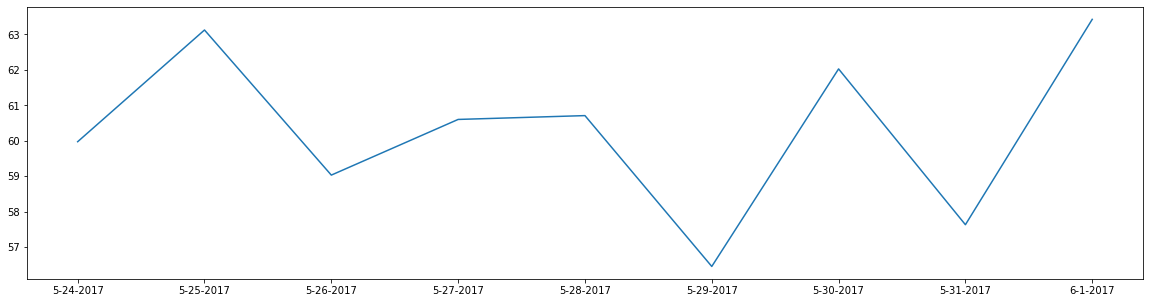

In [71]:
f.collection_date.plot(kind="line",figsize=(20,5))

Text(0, 0.5, 'propotion of  MLA Dissatisfied')

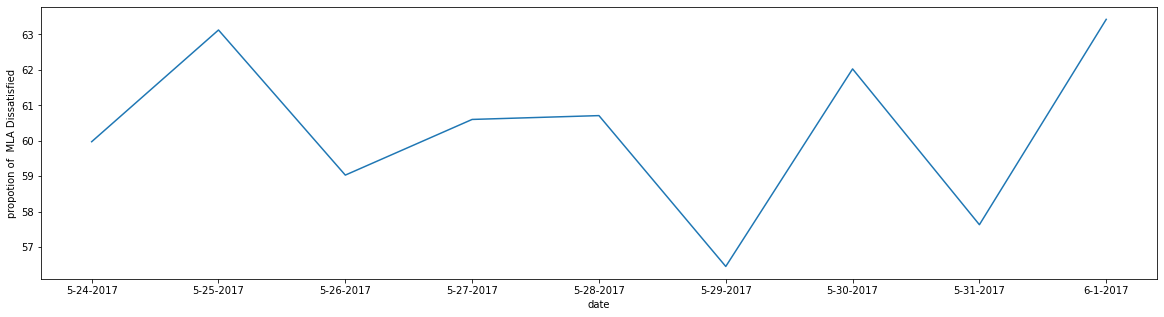

In [72]:
ax=f.collection_date.plot(kind="line",figsize=(20,5))
ax.set_xlabel('date')
ax.set_ylabel('propotion of  MLA Dissatisfied')

# Question 8 - Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples.

In [73]:
data.pivot_table(index = 'Past_Vote', columns = 'Vote_Now', values = 'response_id', aggfunc = 'count')

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7.0,1.0,1630.0,3.0,5.0,42.0,101.0,110.0,44.0,13.0,194.0,32.0,87.0,370.0,88.0,24.0,62.0,10.0
BSP,NaN,1.0,2.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.0,5.0,231.0,2.0,1.0,22.0,41.0,69.0,10.0,16.0,83.0,11.0,51.0,195.0,20.0,3.0,31.0,5.0
HAM,2.0,NaN,25.0,NaN,1.0,NaN,3.0,2.0,2.0,NaN,4.0,NaN,NaN,6.0,4.0,NaN,1.0,NaN
INC,NaN,6.0,6.0,NaN,NaN,57.0,10.0,9.0,NaN,3.0,6.0,3.0,3.0,100.0,1.0,2.0,7.0,NaN
JAP(L),NaN,NaN,4.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN
JD(U),6.0,10.0,254.0,2.0,2.0,45.0,72.0,279.0,29.0,9.0,90.0,18.0,43.0,435.0,13.0,25.0,36.0,6.0
LJP,NaN,NaN,76.0,1.0,NaN,4.0,3.0,6.0,9.0,2.0,3.0,NaN,2.0,17.0,1.0,NaN,1.0,NaN
Left Front,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,18.0,1.0,1.0,NaN,4.0,NaN,1.0,NaN,1.0


# Question 9 - Repeat the above question with the cell values as the sum of “weight”.


In [74]:
data.pivot_table(index = 'Past_Vote', columns = 'Vote_Now',values = 'weight', aggfunc = 'count')

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7.0,1.0,1630.0,3.0,5.0,42.0,101.0,110.0,44.0,13.0,194.0,32.0,87.0,370.0,88.0,24.0,62.0,10.0
BSP,NaN,1.0,2.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.0,5.0,231.0,2.0,1.0,22.0,41.0,69.0,10.0,16.0,83.0,11.0,51.0,195.0,20.0,3.0,31.0,5.0
HAM,2.0,NaN,25.0,NaN,1.0,NaN,3.0,2.0,2.0,NaN,4.0,NaN,NaN,6.0,4.0,NaN,1.0,NaN
INC,NaN,6.0,6.0,NaN,NaN,57.0,10.0,9.0,NaN,3.0,6.0,3.0,3.0,100.0,1.0,2.0,7.0,NaN
JAP(L),NaN,NaN,4.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN
JD(U),6.0,10.0,254.0,2.0,2.0,45.0,72.0,279.0,29.0,9.0,90.0,18.0,43.0,435.0,13.0,25.0,36.0,6.0
LJP,NaN,NaN,76.0,1.0,NaN,4.0,3.0,6.0,9.0,2.0,3.0,NaN,2.0,17.0,1.0,NaN,1.0,NaN
Left Front,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,18.0,1.0,1.0,NaN,4.0,NaN,1.0,NaN,1.0


# Question 10 - Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group.


In [75]:
df.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,agegroup,gender,assembly_no,category,weight
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505
8,9,5-24-2017,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477


In [76]:
df.agegroup.value_counts()

25-40    3844
18-25    2093
40-55     802
55+       128
Name: agegroup, dtype: int64

In [77]:
df5=df.groupby("agegroup").count()

In [78]:
df5

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
agegroup,,,,,,,,,,,,,,
18-25,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093
25-40,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844
40-55,802,802,802,802,802,802,802,802,802,802,802,802,802,802
55+,128,128,128,128,128,128,128,128,128,128,128,128,128,128


# Question 11 - Create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now.

In [79]:
df.head(2)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,agegroup,gender,assembly_no,category,weight
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505
8,9,5-24-2017,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,18-25,Male,181,Gen,0.226477


In [80]:
df.Vote_Now.unique()

array(['JD(U)', 'BJP', 'RJD', 'JAP(L)', 'Others', 'NOTA', 'Plurals',
       'BSP', 'RJJP', 'AAP', 'INC', 'LJP', 'RLSP', 'HAM', 'Undecided',
       'VIP', 'Left Front', 'AIMIM'], dtype=object)

In [81]:
data_j=df[(df.Vote_Now=='JD(U)')]

In [82]:
data_j

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,agegroup,gender,assembly_no,category,weight
4,5,5-24-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505
67,68,5-24-2017,Urban,12th Pass,"₹ 5,000 - ₹ 10,000",JD(U),Did not vote,Somewhat Satisfied,Fully Dissatisfied,24,18-25,Male,184,SC,2.427588
75,76,5-24-2017,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JD(U),VIP,Fully Satisfied,Fully Satisfied,18,18-25,Male,175,BC,0.333505
90,91,5-24-2017,Rural,Graduate,"₹ 80,000 - ₹ 1,50,000",JD(U),Did not vote,Fully Satisfied,Can’t say,22,18-25,Male,171,BC,0.333505
102,103,5-24-2017,Rural,Graduate,"₹ 10,000 - ₹ 20,000",JD(U),JD(U),Fully Satisfied,Somewhat Dissatisfied,20,18-25,Male,173,BC,0.333505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5248,5249,5-24-2017,Urban,Post - Graduation,"₹ 50,000 - ₹ 80,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,63,55+,Male,62,Gen,4.730010
5956,5957,6-1-2017,Urban,12th Pass,"₹ 20,000 - ₹ 30,000",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,57,55+,Male,156,Gen,2.359308
6341,6342,5-26-2017,Rural,Post - Graduation,"₹ 30,000 - ₹ 50,000",JD(U),INC,Fully Satisfied,Somewhat Dissatisfied,70,55+,Male,142,BC,1.495606
6499,6500,5-28-2017,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,55,55+,Male,241,Gen,3.968010


In [83]:
type(data_j)

pandas.core.frame.DataFrame

In [84]:
df6=data_j.groupby("agegroup").count()

In [85]:
df6

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
agegroup,,,,,,,,,,,,,,
18-25,180,180,180,180,180,180,180,180,180,180,180,180,180,180
25-40,264,264,264,264,264,264,264,264,264,264,264,264,264,264
40-55,69,69,69,69,69,69,69,69,69,69,69,69,69,69
55+,13,13,13,13,13,13,13,13,13,13,13,13,13,13


# Question 12 - Join/Merge the two dataframes from questions 10 and 11 with the common column as age_group.

In [86]:
merge= pd.merge(df5,df6,on='agegroup') 

In [87]:
merge

,response_id_x,collection_date_x,urban_rural_x,education_x,income_x,Vote_Now_x,Past_Vote_x,CM_satisfaction_x,MLA_satisfaction_x,age_x,...,income_y,Vote_Now_y,Past_Vote_y,CM_satisfaction_y,MLA_satisfaction_y,age_y,gender_y,assembly_no_y,category_y,weight_y
agegroup,,,,,,,,,,,,,,,,,,,,,
18-25,2093,2093,2093,2093,2093,2093,2093,2093,2093,2093,...,180,180,180,180,180,180,180,180,180,180
25-40,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,...,264,264,264,264,264,264,264,264,264,264
40-55,802,802,802,802,802,802,802,802,802,802,...,69,69,69,69,69,69,69,69,69,69
55+,128,128,128,128,128,128,128,128,128,128,...,13,13,13,13,13,13,13,13,13,13
